In [87]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score

In [79]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [120]:
train_data = datasets.FashionMNIST(root="C:/Users/sachi/OneDrive/Desktop/Codes/learning_pytorch", train=True, download=True, transform=ToTensor(),  target_transform=None)
test_data = datasets.FashionMNIST(root="C:/Users/sachi/OneDrive/Desktop/Codes/learning_pytorch", train=False, download=True, transform=ToTensor())

In [121]:
classes = train_data.classes
len(classes)

10

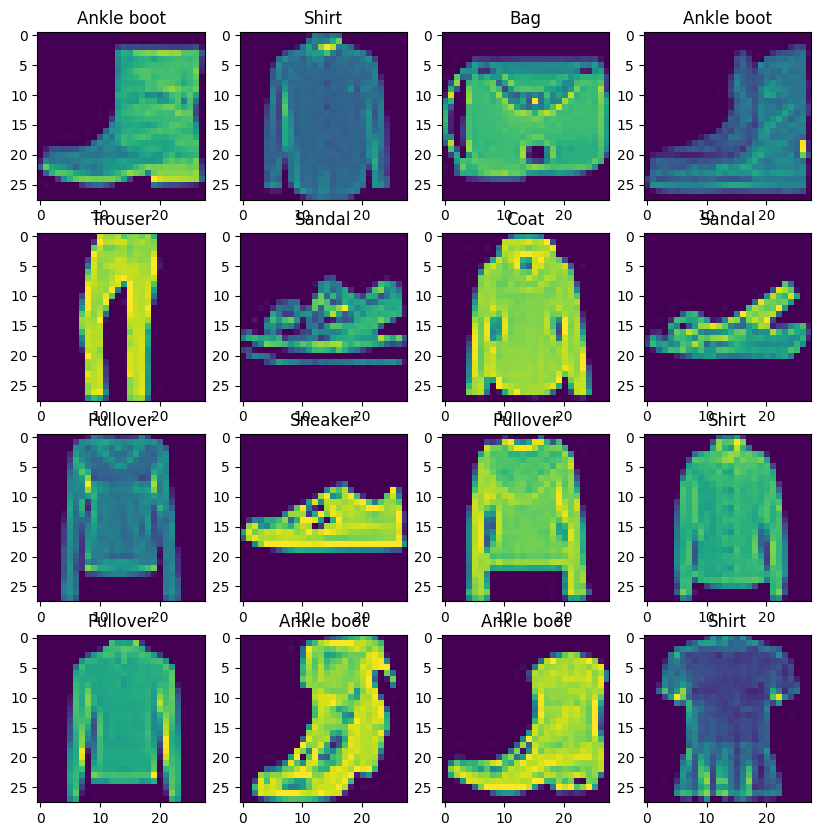

In [122]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_data.data), (16,))

plt.figure(figsize=(10,10))

for idx, i in zip(random_idx, range(16)):
    image, label = train_data[idx]
    plt.subplot(4, 4, i+1)
    plt.imshow(image.squeeze())
    plt.title(classes[label])

In [123]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

In [124]:
class FashionMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.flat = nn.Flatten()
        self.layer1 = nn.Linear(28*28, 1024)
        self.layer2 = nn.Linear(1024, 512)
        self.layer3 = nn.Linear(512, 256)
        self.layer4 = nn.Linear(256, 128)
        self.layer5 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x: torch.Tensor):
        x0 = self.flat(x)
        x1 = self.layer1(x0)
        x2 = self.relu(x1)
        x3 = self.layer2(x2)
        x4 = self.relu(x3)
        x5 = self.layer3(x4)
        x6 = self.relu(x5)
        x7 = self.layer4(x6)
        x8 = self.relu(x7)
        x9 = self.layer5(x8)

        return x9

model = FashionMNIST().to(device)


In [125]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [ ]:
num_epochs = 100

train_accuraccy_values = []
test_accuracy_values = []
train_loss_values = []
test_loss_values = []

# accuracy after each epoch
# loss after each epoch

for epochs in tqdm(range(num_epochs)):
    train_loss_cum = 0
    test_loss_cum = 0
    train_accuracy_cum = 0
    test_accuracy_cum = 0
    for batch, (X, y) in enumerate(train_loader):
        model.train()

        train_logits = model(X)
        train_y_pred = torch.softmax(train_logits, dim=1).argmax(dim=1)
        train_loss = loss_fn(train_logits, y)
        train_loss_cum += train_loss
        train_accuracy = accuracy_score(y, train_y_pred.detach().numpy())
        train_accuracy_cum += train_accuracy
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

    model.eval()
    avg_train_accuracy = train_accuracy_cum/len(train_loader)
    avg_train_loss = train_loss_cum/len(train_loader)

    with torch.inference_mode():
        for X, y in test_loader:
            test_logits = model(X)
            test_y_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
            test_loss = loss_fn(test_logits, y)
            test_loss_cum += test_loss
            test_accuracy = accuracy_score(y, test_y_pred.detach().numpy())
            test_accuracy_cum += test_accuracy
        
    avg_test_accuracy = test_loss_cum/len(test_loader)
    avg_test_loss = test_accuracy_cum/len(test_loader)
    train_accuraccy_values.append(avg_train_accuracy)
    test_accuracy_values.append(avg_test_accuracy)
    train_loss_values.append(avg_train_loss)
    test_loss_values.append(avg_test_loss)
    
    if((epochs + 1) % 10 == 0):
        print(f"Epoch {epochs}: Train Accuracy {avg_train_accuracy} | Test Accuracy {avg_test_accuracy}")

            